In [1]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from preprocess_util import stan, pre_process_data, impute_vals
import tensorflow as tf

/Users/cyrilukwajiunor/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
a_train = pd.read_csv("data/A_hhold_train.csv", index_col='id')
b_train = pd.read_csv("data/B_hhold_train.csv", index_col='id')
c_train = pd.read_csv("data/C_hhold_train.csv", index_col='id')
a_test = pd.read_csv("data/A_hhold_test.csv", index_col='id')
b_test = pd.read_csv("data/B_hhold_test.csv", index_col='id')
c_test = pd.read_csv("data/C_hhold_test.csv", index_col='id')

**HANDLE A DATASET**

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8203 entries, 46107 to 39832
Columns: 345 entries, wBXbHZmp to country
dtypes: bool(1), float64(2), int64(2), object(340)
memory usage: 21.6+ MB
None
(8203, 345)


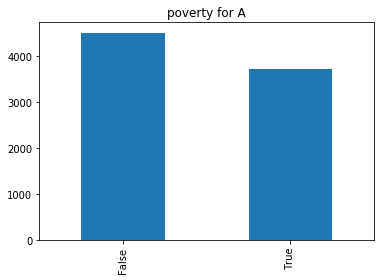

In [3]:
# Handle a_train dataset
print(a_train.info())
print(a_train.shape)
a_train.poor.value_counts().plot.bar(title="poverty for A")

In [4]:
# Preprocess A dataset
print('country A')

a_trainX = pre_process_data(a_train.drop('poor', axis=1))
a_trainY = np.ravel(a_train.poor)

country A
input shape	(8203, 344)
After standardization	(8203, 344)
After one hot encoding of categoricals	(8203, 859)


In [5]:
a_trainY = a_trainY.reshape(8203,1)
print(a_trainX.shape)
print(a_trainY.shape)

(8203, 859)
(8203, 1)


**HANDLE B DATASET**

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255 entries, 57071 to 4923
Columns: 442 entries, RzaXNcgd to country
dtypes: bool(1), float64(9), int64(14), object(418)
memory usage: 11.0+ MB
None


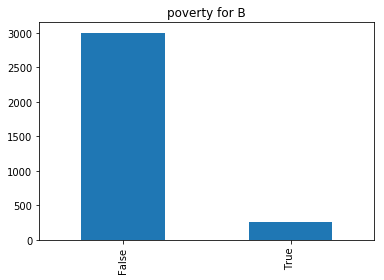

In [6]:
# Handle b_train dataset
print(b_train.info())
b_train.shape
b_train.poor.value_counts().plot.bar(title="poverty for B")

In [7]:
# fill Nan values with mean for numerical variable for b_train dataset
b_train = impute_vals(b_train)

In [8]:
# Preprocess B dataset
print('country B')

b_trainX = pre_process_data(b_train.drop('poor', axis=1))
b_trainY = np.ravel(b_train.poor)

country B
input shape	(3255, 441)
After standardization	(3255, 441)
After one hot encoding of categoricals	(3255, 1432)


In [9]:
# Oversample the underrepresented dataset using SMOTE
b_trainXR, b_trainYR = SMOTE().fit_sample(b_trainX, b_trainY)

In [10]:
b_trainYR = b_trainYR.reshape(6008,1)
print(b_trainXR.shape)
print(b_trainYR.shape)

(6008, 1432)
(6008, 1)


<function matplotlib.pyplot.show>

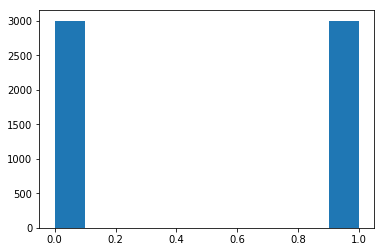

In [11]:
plt.hist(b_trainYR)
plt.show

**HANDLE C DATASET**

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6469 entries, 57211 to 7646
Columns: 164 entries, GRGAYimk to country
dtypes: bool(1), float64(1), int64(29), object(133)
memory usage: 8.1+ MB
None


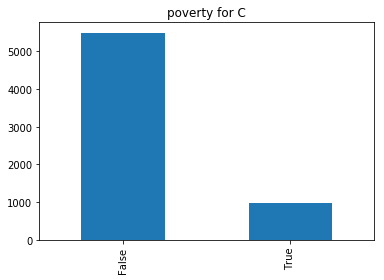

In [12]:
# Handle c_train dataset
print(c_train.info())
c_train.shape
c_train.poor.value_counts().plot.bar(title="poverty for C")

In [13]:
# fill Nan values with mean for numerical variable for b_train dataset
c_train = impute_vals(c_train)

In [14]:
# Preprocess C dataset
print('country C')

c_trainX = pre_process_data(c_train.drop('poor', axis=1))
c_trainY = np.ravel(c_train.poor)

country C
input shape	(6469, 163)
After standardization	(6469, 163)
After one hot encoding of categoricals	(6469, 795)


In [15]:
# Oversample the underrepresented dataset using SMOTE
c_trainXR, c_trainYR = SMOTE().fit_sample(c_trainX, c_trainY)

In [16]:
c_trainYR = c_trainYR.reshape(10992,1)
print(c_trainXR.shape)
print(c_trainYR.shape)

(10992, 795)
(10992, 1)


<function matplotlib.pyplot.show>

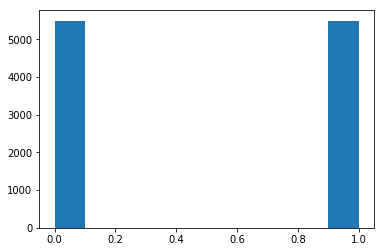

In [17]:
plt.hist(c_trainYR)
plt.show

# BUILD AND TEST MODELS

In [18]:
# process the test data
a_test = pre_process_data(a_test, enforce_cols=a_trainX.columns)
b_test = pre_process_data(b_test, enforce_cols=b_trainX.columns)
c_test = pre_process_data(c_test, enforce_cols=c_trainX.columns)

input shape	(4041, 344)
After standardization	(4041, 344)
After one hot encoding of categoricals	(4041, 851)
input shape	(1604, 441)
After standardization	(1604, 441)
After one hot encoding of categoricals	(1604, 1419)
input shape	(3187, 163)
After standardization	(3187, 163)
After one hot encoding of categoricals	(3187, 773)


In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
def train_model(features, labels, **kwargs):
    # instantiate model
    model = RandomForestClassifier(n_estimators=50, random_state=0)
    
    # train model
    model.fit(features, labels)
    
    # get a (not-very-useful) sense of performance
    accuracy = model.score(features, labels)
    print(f"In-sample accuracy: {accuracy:0.2%}")
    
    return model

In [21]:
model_a = train_model(a_trainX, a_trainY)

/Users/cyrilukwajiunor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In-sample accuracy: 100.00%


In [22]:
model_b = train_model(b_trainXR, b_trainYR)

/Users/cyrilukwajiunor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In-sample accuracy: 100.00%


In [23]:
model_c = train_model(c_trainXR, c_trainYR)

/Users/cyrilukwajiunor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In-sample accuracy: 100.00%


In [27]:
b_test = b_test.fillna(0)

In [28]:
a_preds = model_a.predict_proba(a_test)
b_preds = model_b.predict_proba(b_test)
c_preds = model_c.predict_proba(c_test)

In [29]:
def make_country_sub(preds, test_feat, country):
    # make sure we code the country correctly
    country_codes = ['A', 'B', 'C']
    
    # get just the poor probabilities
    country_sub = pd.DataFrame(data=preds[:, 1],  # proba p=1
                               columns=['poor'], 
                               index=test_feat.index)

    
    # add the country code for joining later
    country_sub["country"] = country
    return country_sub[["country", "poor"]]

In [30]:
# convert preds to data frames
a_sub = make_country_sub(a_preds, a_test, 'A')
b_sub = make_country_sub(b_preds, b_test, 'B')
c_sub = make_country_sub(c_preds, c_test, 'C')

In [31]:
submission = pd.concat([a_sub, b_sub, c_sub])

In [32]:
submission.head()

,country,poor
id,,
418,A,0.32
41249,A,0.28
16205,A,0.26
97501,A,0.36
67756,A,0.26


In [33]:
submission.tail()

,country,poor
id,,
6775,C,0.28
88300,C,0.36
35424,C,0.24
81668,C,0.24
98377,C,0.22


In [34]:
submission.to_csv('submission.csv')

In [36]:
c_trainXR

array([[-0.60673885, -0.35034044, -0.31384692, ...,  0.        ,
         1.        ,  1.        ],
       [-0.60673885,  3.90743356, -0.31384692, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.74251987, -0.29965265,  0.44998894, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 0.77609196, -0.35034044,  1.21382479, ...,  0.01244094,
         0.        ,  1.        ],
       [ 7.25025739, -0.39654729,  0.44998894, ...,  0.        ,
         0.08840265,  1.        ],
       [-0.30272726, -0.26038571,  1.21382479, ...,  0.        ,
         0.        ,  1.        ]])

In [38]:
submission[submission.poor >= 0.5]

,country,poor
id,,
49381,A,0.50
4519,A,0.50
3641,A,0.52
55442,B,0.50
64544,B,0.52
60204,B,0.54
77704,B,0.50
4689,B,0.50
39323,B,0.58
